# 43008: Reinforcement Learning

## Week 2: Exploring Multi-Arm Bandit using:
* Epsilon Greedy
* Upper Confidence Bound (UCB)

### What you will learn?
1. Create/Setup Multi-Arm Bandit Environment
2. Develop Epsilon-Greedy Algorithm
3. Develop Upper Confidence Bound (UCB) Algorithm
4. Compare both Algorithms

## The Multi-Armed Bandit Problem:
The Multi-Armed Bandit problem is a classical reinforcement learning problem where you have a fixed limited amount of resources and you need to allocate them among competing alternatives to maximize your total reward. The problem gets its name from the lever slot machines (or "one-armed bandits") in a casino. Suppose you're in a casino faced with multiple slot machines, each with different unknown payout rates. How do you decide which levers to pull to maximize your total payout?

Let's start by creating our own multi-armed bandit problem. We will create a bandit with 10 arms, each with a random payout rate drawn from a normal distribution.

## Part 1: Setting up the Environment

Let's start by creating our own multi-armed bandit problem with '*`n`*' arms (or slot machines) using Python. Each arm will have a random payout rate.

<img src='https://drive.google.com/uc?id=16kgjLT7Bj52HLDQvpu7h9m4pJZNt4fnE' height=150>

In [ ]:
import numpy as np

class MultiArmBandit:
    # Initialize Bandit with given number of Arms
    def __init__(self, num_arms):
        self.num_arms = num_arms

    # Define random rewards when arm is pulled
    def pull_Arm(self, arm):
        reward = np.random.normal(0, 1)
        return reward

## Part 2: Develop Epsilon-Greedy Algorithm

Now, we can create the epsilon-greedy algorithm. This algorithm will choose the current best arm most of the time but will occasionally explore the other arms.

<img src='https://drive.google.com/uc?id=1SyIFVBregQkT1Jabtqq17g1ZU2SrlNqt' height=350>


### Part 2a: Develop Epsilon-Greedy Algorithm

In [ ]:
def epsilon_greedy(bandit, num_episodes, epsilon=0.1):

  """
  Epsilon-Greedy Algorithm for a multi-armed bandit problem.

  Parameters:
    bandit (Object): The Multi-Arm Bandit object which is to be used
    num_episodes (int): Number of episodes to run the simulation
    epsilon (float): Exploration rate (between 0 and 1)

  Return:
   Q_Values: The estimated rewards for each arm after the simulation.
   Num_pulls: Number of times each arm is pulled

  """
  # Initialze Q_Values and Num_pulls matrices to Zero
  Q_Values = np.zeros(bandit.num_arms)
  Num_pulls = np.zeros(bandit.num_arms)
  rewards = [] # Keep a track of rewards
  num_random_pulls = 0  # Number of times arms were pulled randomly (only once, i.e., not exploited)
  num_greedy_pulls = 0  # Number of times arms were pulled greedily (more than once, i.e., exploited)

  # Run Episodes and find rewards
  for step in range(num_episodes):
        if np.random.uniform(0, 1) < epsilon:
            # Exploration phase: Select a random arm
            chosen_arm = np.random.randint(bandit.num_arms)
            num_random_pulls += 1
        else:
            # Exploitation phase: Select the arm with the highest estimated reward
            chosen_arm = np.argmax(Q_Values)
            num_greedy_pulls += 1

        # Pull the chosen arm and receive the reward
        reward = bandit.pull_Arm(chosen_arm)

        # Keep a track of all rewards
        rewards.append(reward)
        Num_pulls[chosen_arm] += 1 # Increase the chosen Arm Count
        Q_Values[chosen_arm] += (1 / Num_pulls[chosen_arm]) * (reward - Q_Values[chosen_arm]) # Esitmate Q_Values for the chosen Arm

  return Q_Values, Num_pulls, rewards, num_random_pulls, num_greedy_pulls

### Part 2b: Test and Evaluate Epsilon-Greedy Algorithm

Average Reward: -0.011073757380092877
Exploration-Exploitation Ratio: 0.12994350282485875


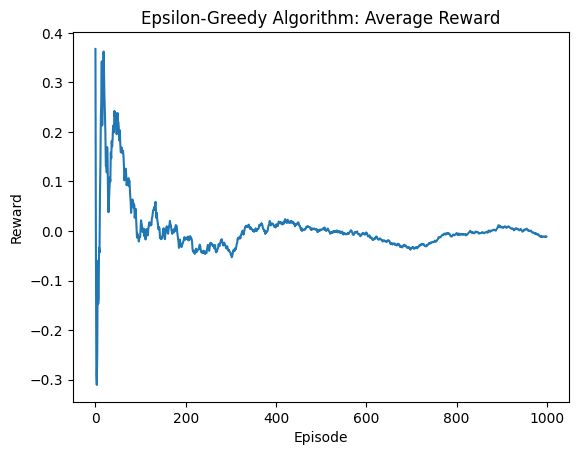

<BarContainer object of 10 artists>

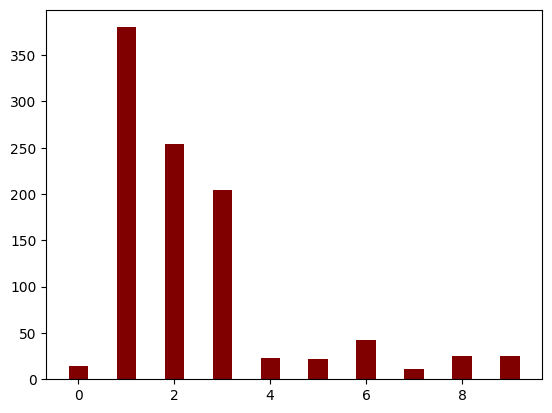

In [ ]:
import matplotlib.pyplot as plt

# Testing Epsilon Greedy implementation
# Create Multi-Arm Bandit object with 'n' number of Arms
no_arms = 10
num_episodes = 1000
bandits = MultiArmBandit(no_arms)

# Execute epsilon_greedy algorithm
Q_Values, Num_pulls, rewards, num_random_pulls, num_greedy_pulls = epsilon_greedy(bandits, num_episodes, epsilon=0.1)

# Evaluate Epsilon-Greedy algorithm
# 1. Average Rewards
# Calculate the average reward over all arms
average_reward = np.mean(rewards)
print("Average Reward:", average_reward)

# 2. exploration-exploitation ratio
# Calculate the exploration-exploitation ratio
exploration_exploitation_ratio = num_random_pulls / num_greedy_pulls #if num_greedy_pulls > 0 else float('inf')
print("Exploration-Exploitation Ratio:", exploration_exploitation_ratio)

# 3. Average reward overtime
# Plot Average reward over episodes/time
plt.plot(np.cumsum(rewards) / np.arange(1, num_episodes+1))
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Epsilon-Greedy Algorithm: Average Reward")
plt.show()

# Plot Rewards and Arm Pulls
arms = list(range(0, no_arms))
plt.bar(arms, Num_pulls, color ='maroon',
        width = 0.4)

## Part 3: UCB Algorithm

Next, we'll implement the Upper Confidence Bound (UCB) algorithm, which chooses the arm that has the highest upper confidence bound.

<img src='https://drive.google.com/uc?id=1HMh3hV5JwcL1xLQ1eUWeShGWLdKw3pT2' height=350>

### Part 3a: Develop UB Algorithm

In [ ]:
def ucb(bandit, num_episodes):
  """
    Upper Confidence Bound (UCB) algorithm for the multi-armed bandit problem.

    Parameters:
        num_arms (int): Number of arms in the bandit.
        num_episodes (int): Number of episodes to run the simulation.

    Returns:
        Q_values (list): The estimated rewards for each arm after the simulation.
        Num_pulls: Number of times each arm is pulled
  """
  # Initialze Q_Values and Num_pulls matrices to Zero
  Q_Values = np.zeros(bandit.num_arms)
  Num_pulls = np.zeros(bandit.num_arms)
  rewards = []

  # Run Episodes and find rewards
  for step in range(num_episodes):
        # Estimate Upper Confidence Bound
        ucb_values = Q_Values + np.sqrt(2 * np.log(step + 1) / (Num_pulls + 1e-5))

        # Choose the Arm
        chosen_arm = np.argmax(ucb_values)

        # Pull the chosen arm and receive the reward
        reward = bandit.pull_Arm(chosen_arm)

        # Store cumulative reward for plotting
        rewards.append(reward)

        Num_pulls[chosen_arm] += 1 # Increase the chosen Arm Count
        Q_Values[chosen_arm] += (1 / Num_pulls[chosen_arm]) * (reward - Q_Values[chosen_arm]) # Esitmate Q_Values for the chosen Arm

  return Q_Values, Num_pulls, rewards

### Part 3a: Test and evaluate UCB Algorithm

Average Reward: 0.037882044773101836


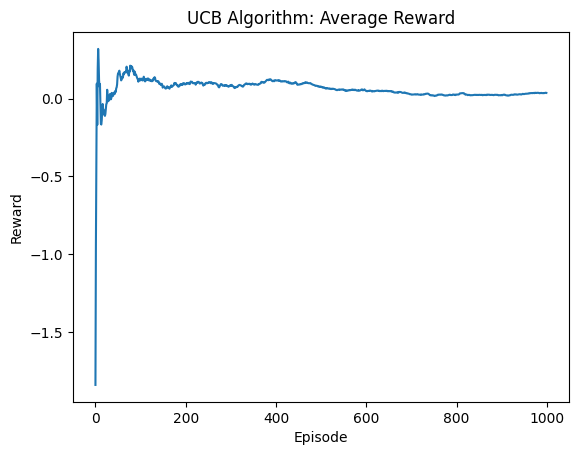

<BarContainer object of 10 artists>

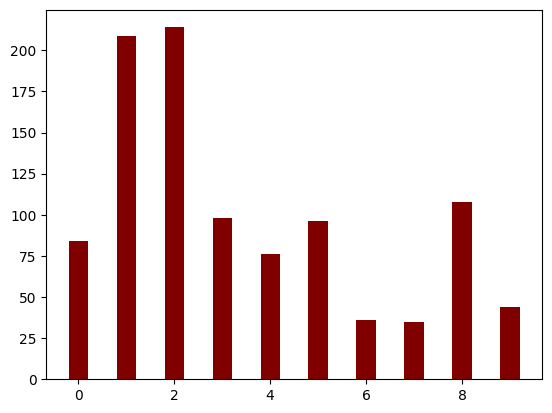

In [ ]:
import matplotlib.pyplot as plt
# Testing UCB algorithm implementation
# Create Multi-Arm Bandit object with 'n' number of Arms
no_arms = 10
num_episodes = 1000
bandits = MultiArmBandit(no_arms)

estimated_rewards, no_arm_pulls, rewards = ucb(bandits, num_episodes)

# Evaluate Epsilon-Greedy algorithm
# 1. Average Rewards
# Calculate the average reward over all arms
average_reward = np.mean(rewards)
print("Average Reward:", average_reward)


# 2. Average reward overtime
# Plot Average reward over episodes/time
plt.plot(np.cumsum(rewards) / np.arange(1, num_episodes+1))
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("UCB Algorithm: Average Reward")
plt.show()

# Plot Rewards and Arm Pulls
arms = list(range(0, no_arms))
plt.bar(arms, no_arm_pulls, color ='maroon',
        width = 0.4)

## Part 4: Comparing Epsilon-Greedy and UCB

Finally, we'll compare the performance of the epsilon-greedy and UCB algorithms. One common metric is the average reward over time.

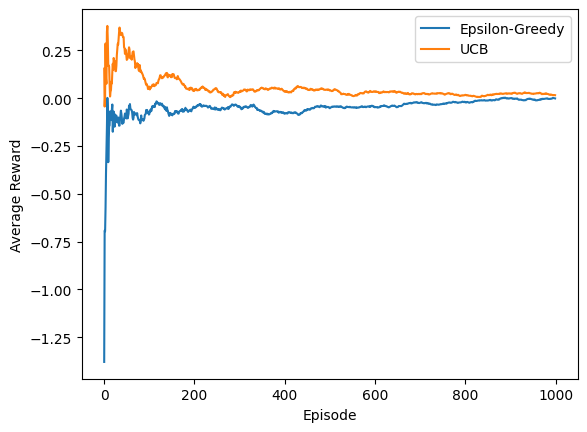

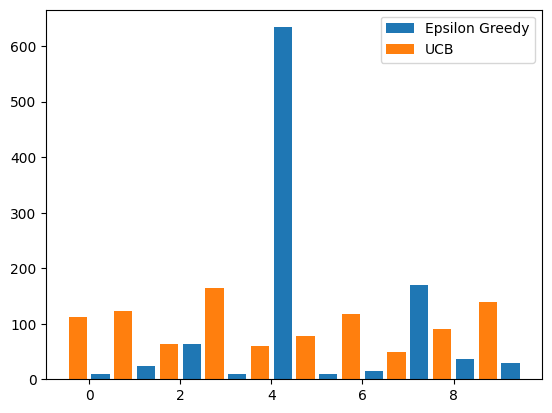

In [ ]:
import matplotlib.pyplot as plt
# Setup the Multi-Arm Bandit problem
num_episodes=1000
no_arms = 10
bandits = MultiArmBandit(no_arms)

# Run Epsilon-Greedy and UCB Algorithms on same Multi-Arm Bandit problem
Q_Values, Num_pulls, rewards_epsilon_greedy, num_random_pulls, num_greedy_pulls = epsilon_greedy(bandits, num_episodes, epsilon=0.1)
estimated_rewards, no_arm_pulls, rewards_ucb = ucb(bandits, num_episodes)

# Plot Average reward over episodes/time
plt.plot(np.cumsum(rewards_epsilon_greedy) / np.arange(1, num_episodes+1), label='Epsilon-Greedy')
plt.plot(np.cumsum(rewards_ucb) / np.arange(1, num_episodes+1), label='UCB')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.show()

# Plot Arm Pulls for both algorithms
width = 0.25
arms = np.arange(no_arms)
plt.bar(arms + width, Num_pulls, 0.4, label = 'Epsilon Greedy')
plt.bar(arms - width, no_arm_pulls, 0.4, label = 'UCB')
plt.legend()


You'll see the average reward over time for both the epsilon-greedy and UCB algorithms. This will show you which algorithm performs better on this particular bandit problem. Remember, the best algorithm can change based on the bandit problem and the specific parameters used, so it's important to try different approaches and adjust the parameters as needed.